In [63]:
# Cell 1: Import the necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [64]:
# Cell 2: Define paths and parameters for the training and validation data
train_data_dir = 'D:/ECOLEIT/4IA/Car Accident Detection Systeme/dataset/train'  # Your path to the training data
validation_data_dir = 'D:/ECOLEIT/4IA/Car Accident Detection Systeme/dataset/validation'  # Your path to the validation data
batch_size = 64
target_size = (224, 224)
epochs = 25

In [65]:
# Cell 3: Create data generators for training and validation sets
# Cell 3: Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation range for augmentation
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)
print(train_generator.class_indices)

Found 1530 images belonging to 2 classes.
Found 1648 images belonging to 2 classes.
{'accidents': 0, 'no_accidents': 1}


In [66]:
# Cell 4: Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),  # New convolutional layer
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
#print(model.summary())

In [67]:
# Cell 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for refinement
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
# Cell 6: Train the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('outputs/best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.4619 - loss: 0.7246 - val_accuracy: 0.6256 - val_loss: 0.6892 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5765 - loss: 0.6867 - val_accuracy: 0.6086 - val_loss: 0.6732 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5845 - loss: 0.6789 - val_accuracy: 0.6256 - val_loss: 0.6537 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.6202 - loss: 0.6548 - val_accuracy: 0.6268 - val_loss: 0.6568 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6508 - loss: 0.6352 - val_accuracy: 0.6208 - val_loss: 0.6516 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6320 - loss: 0.6392 - val_accuracy: 0.6359 - val_loss: 0.6517 - learning_rate: 1.0000e-04
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6448 - loss:

In [69]:
# Cell 7: Save the trained model
model.save('outputs/car_accident_detector.h5')
print('Model saved successfully!')

Model saved successfully!


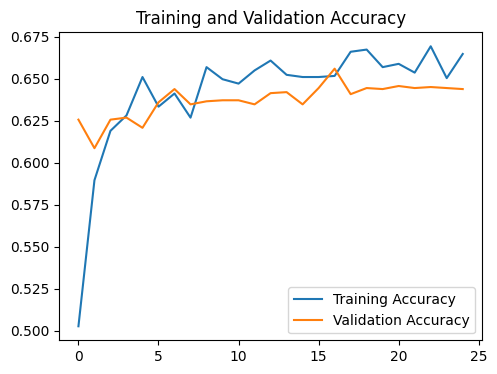

In [70]:
# Cell 8: Plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

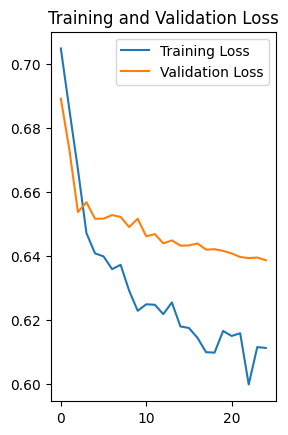

In [71]:
# Cell 9: Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()